# Obtaining the acceptance function numerically from the calculation of geometric acceptance based on the definition of the solid angle.

**Summary:** with the following code we calculate the angular resolution and the acceptance for the MuTe-UIS Telescope. 

Details for this calculation can be complemented and sustented from adjunt document in section 4.

In [1]:
%matplotlib inline
import numpy as np
import random
np.seterr(divide='ignore', invalid='ignore')
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
from scipy.misc import imread                   # Cargo imread de scipy.misc
import math
from matplotlib import cm
import csv, operator
import scipy.stats as st
from numpy import random
import pandas as pd
#from matplotlib.mlab import griddata

In [2]:
H=200.
h=4.
Np=30.
L=0
Nd=Np**2
alphamin=np.arccos((h*Np)/(np.sqrt(2*(h*Np)**2+H**2)))
print(alphamin)

1.0956194772968015


In [3]:
def OmegaCal(alpha, beta, H=200, h=4, Np=30, L=0):
    Nd=Np**2
    alphamin=np.arccos((h*Np)/(np.sqrt(2*(h*Np)**2+H**2)))
    r = np.sqrt(1.-(np.cos(alpha)**2)-(np.cos(beta)**2))
    m = H*np.abs(np.cos(alpha))/(h*r)
    n = H*np.abs(np.cos(beta))/(h*r)
    S=np.abs(h**2*(Np-m)*(Np-n))
    N1=h**2*(H-L)
    D11=((H-L)**2+h**2*(m**2+n**2-n))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n+0.5)*h)**2))
    D12=0.5*(2*(H-L)**2+h**2*(2*m**2+2*n**2-1))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n-0.5)*h)**2))
    D13=((H-L)**2+h**2*(m**2+n**2-m))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n-0.5)*h)**2))
    D14=(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n+0.5)*h)**2))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n-0.5)*h)**2))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n-0.5)*h)**2))
    N2=h**2*(H-L)
    D21=((H-L)**2+h**2*(m**2+n**2+n))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n-0.5)*h)**2))
    D22=((H-L)**2+h**2*(m**2+n**2+m))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n+0.5)*h)**2))
    D23=0.5*(2*(H-L)**2+h**2*(2*m**2+2*n**2-1))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n+0.5)*h)**2))
    D24=(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n-0.5)*h)**2))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n+0.5)*h)**2))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n+0.5)*h)**2))
    Omega=8*np.arctan(N1/(D11+D12+D13+D14))+8*np.arctan(N2/(D21+D22+D23+D24))
    Acep = Omega*S/4
    return Omega, Acep

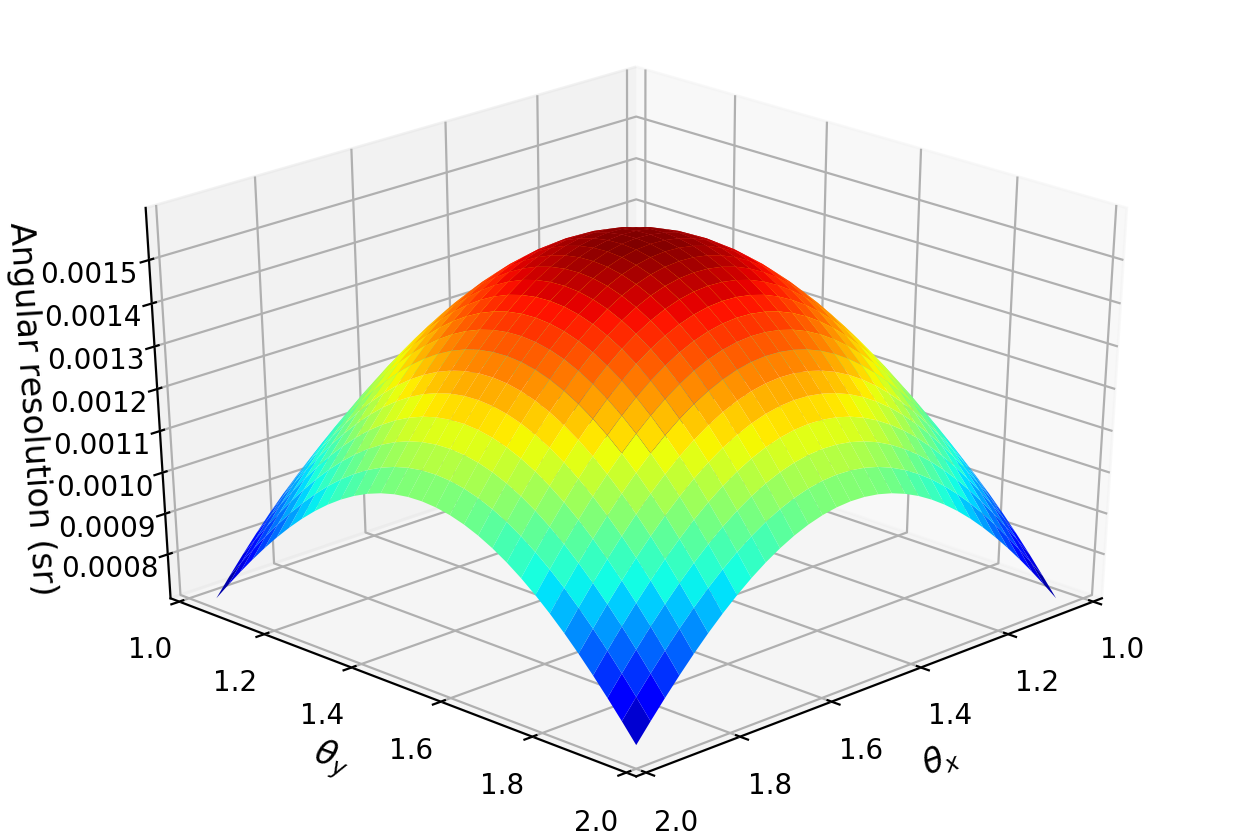

In [4]:
fig = plt.figure(num = None, figsize = (6, 4), dpi = 200)
ax = Axes3D(fig)
alpha = np.arange(alphamin, np.pi-alphamin, 0.03)
beta = np.arange(alphamin, np.pi-alphamin, 0.03)
alpha, beta = np.meshgrid(alpha, beta)
Omega, Acep = OmegaCal(alpha, beta)
ax.set_xlim3d(1, 2)
ax.set_ylim3d(1, 2)
#ax.set_zlim3d(0, 0.0011)
ax.set_xlabel(r'$\theta_x$', fontsize = 12)
ax.set_ylabel(r'$\theta_y$', fontsize = 12)
ax.set_zlabel(r'Angular resolution (sr)', fontsize = 12)
ax.view_init(elev=30,azim=45) 
ax.dist=10
ax.plot_surface(alpha, beta, Omega, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.6, antialiased=True)
plt.savefig('/home/david/Escritorio/angularresolution.png')

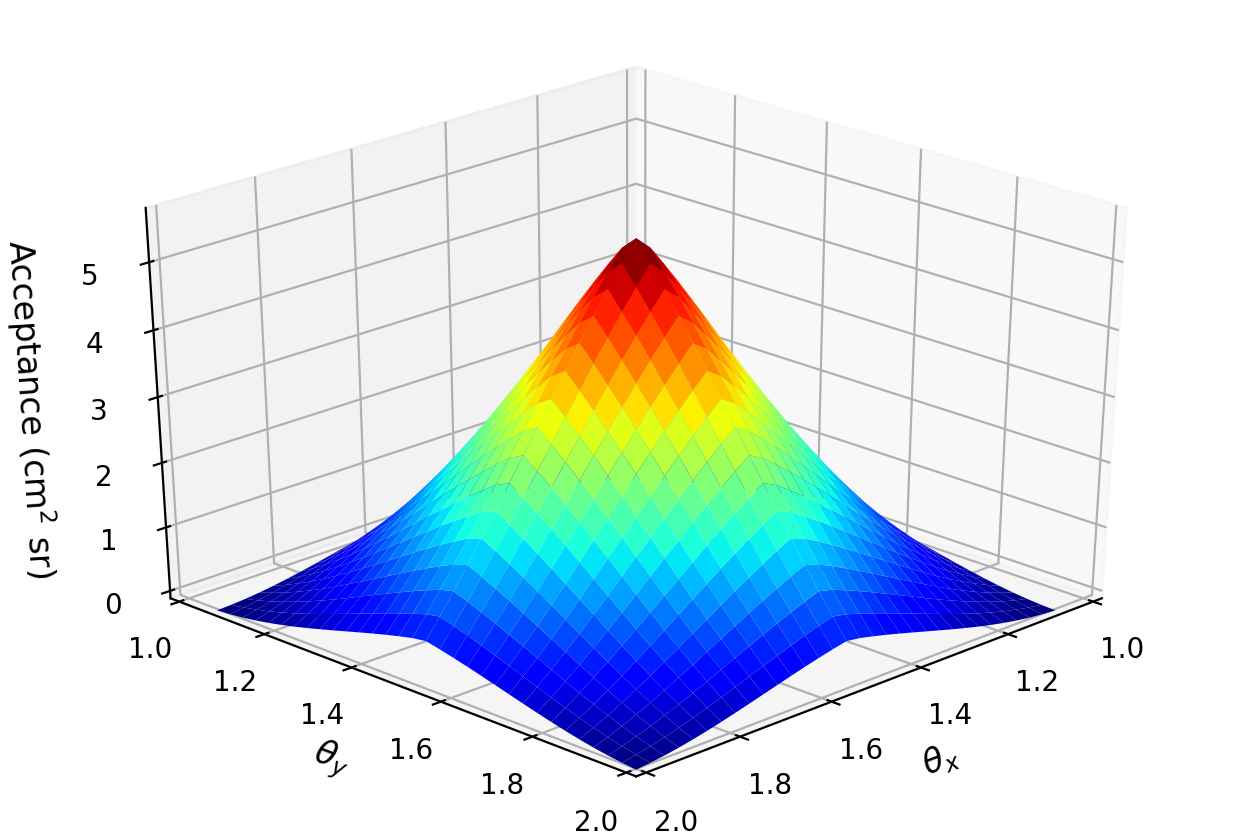

In [5]:
fig = plt.figure(num = None, figsize = (6, 4), dpi = 200)
ax = Axes3D(fig)
alpha = np.arange(alphamin, np.pi-alphamin, 0.03)
beta = np.arange(alphamin, np.pi-alphamin, 0.03)
alpha, beta = np.meshgrid(alpha, beta)
Omega, Acep = OmegaCal(alpha, beta)
ax.set_xlim3d(1, 2)
ax.set_ylim3d(1, 2)
#ax.set_zlim3d(0, 0.0011)
ax.set_xlabel(r'$\theta_x$', fontsize = 12)
ax.set_ylabel(r'$\theta_y$', fontsize = 12)
ax.set_zlabel(r'Acceptance (cm$^2$ sr)', fontsize = 12)
ax.view_init(elev=30,azim=45) 
ax.dist=10
ax.plot_surface(alpha, beta, Acep, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.6, antialiased=True)
plt.savefig('/home/david/Escritorio/acceptance.png')

Ahora calculamos los máximos de la resolución angular y de la aceptancia respectivamente...

In [6]:
alpha=np.pi/2
beta=np.pi/2
print(alpha)
Omega, Acep = OmegaCal(alpha, beta)
print('Para el caso de nuestro telescopio MuTe, tenemos que:')
print('Omega(max)=', Omega)
print('Acep(max)=', Acep)

1.5707963267948966
Para el caso de nuestro telescopio MuTe, tenemos que:
Omega(max)= 0.001599840018664267
Acep(max)= 5.759424067191359


Calculemos la resolución angular y la aceptancia para una dirección determinada..

In [7]:
alpha=np.radians(60.57588014)
beta=np.radians(70.10381248)
print('alpha=', alpha)
print('beta=', beta)

alpha= 1.0572485557364437
beta= 1.2235423459766914


In [8]:
Omega, Acep = OmegaCal(alpha, beta)
print('La resolución angular para esta dirección particular es, Omega(rmn)=', Omega)
print('La aceptancia para esta dirección particular es, Acep(rmn)=', Acep)

La resolución angular para esta dirección particular es, Omega(rmn)= 0.0008246487034033604
La aceptancia para esta dirección particular es, Acep(rmn)= 0.0184299239972013
